In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
breastCancer = pd.read_csv('Breast-Cancer.csv')
breastCancer.head(5)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
breastCancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
breastCancer.drop(columns = "Id", inplace = True)
breastCancer.isnull().sum()

KeyError: "['Id'] not found in axis"

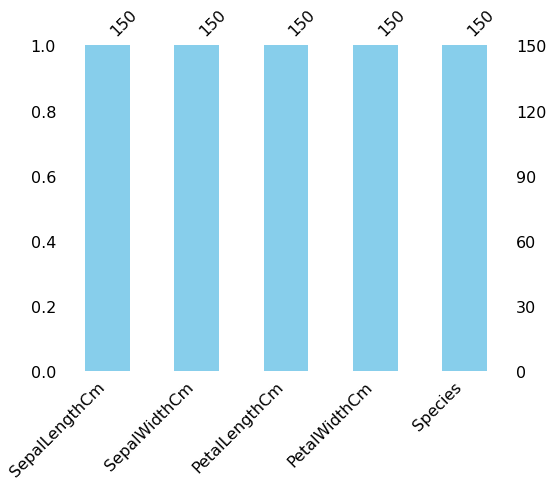

In [6]:

import missingno as msno
msno.bar(breastCancer, figsize = (8, 6), color = 'skyblue')
plt.show()


In [5]:
#Scatterplot

g = sns.relplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = breastCancer, hue = 'Species', style = 'Species')
g.fig.set_size_inches(10, 5)
plt.show()

ValueError: Could not interpret value `SepalLengthCm` for parameter `x`

In [9]:
#cek korelasi antar fitur

breastCancer.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


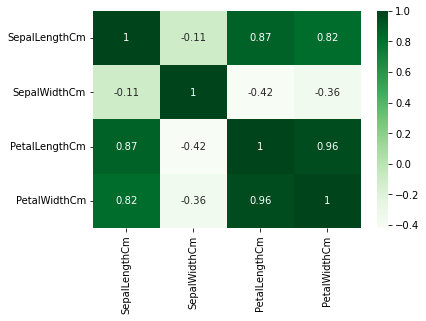

In [10]:
sns.heatmap(breastCancer.corr(), annot = True, cmap = 'Greens')
plt.show()

In [11]:

#Pisahkan antara fitur dan label 

X = breastCancer.drop('Species', axis = 1)
y = breastCancer['Species']


In [12]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
#Spliting data menjadi train data dan test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('The shape of X_train is : {}'.format(X_train.shape))
print('The shape of X_test is : {}'.format(X_test.shape))
print('The shape of y_train is : {}'.format(y_train.shape))
print('The shape of y_test is : {}'.format(y_test.shape))

The shape of X_train is : (120, 4)
The shape of X_test is : (30, 4)
The shape of y_train is : (120,)
The shape of y_test is : (30,)


In [17]:
#model training

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [18]:
#prediksi data pada train

pred_train = model.predict(X_train)

cm = confusion_matrix(y_train, pred_train)

#confusion matrixt

print('Confusion matrix Decision Tree\n', cm)
print('')

#akurasi
print('Akurasi pada saat training : {}'.format(accuracy_score(y_train, pred_train))) #confusion matrix


Confusion matrix Decision Tree
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]

Akurasi pada saat training : 1.0


In [21]:
#Prediksi pada data test
pred_test = model.predict(X_test)

cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average = 'micro')
recall = recall_score(y_test, pred_test, average = 'micro')
f1 = f1_score(y_test, pred_test, average = 'micro')

print('Confusion matrix Decision Tree\n', cm)
print('Akurasi pada data test: %.3f' %accuracy)
print('precision : %.3f' %precision)
print('recall : %.3f' %recall)
print('f1-score : %.3f' %f1)



Confusion matrix Decision Tree
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Akurasi pada data test: 1.000
precision : 1.000
recall : 1.000
f1-score : 1.000
